<a href="https://colab.research.google.com/github/piyushnashani/GRIP-Intern-Tasks/blob/main/GRIP_Task1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - GRIP JUN'21**
# **Data Science and Business Analytics Intern**

> **Task 1: The objective is to predict the percentage scored by students when number of hours studied by the student is provided**

#### Done by: **Piyush Prakash Nashani**



**Step 1: Import the libraries**




In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 2: Import the dataset**


In [199]:
path="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(path)
data.head()               # Head function displays the data, by default shows 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [200]:
# Checking for any the data with null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [201]:
#Reshapping the x and y data to transform them into 2D array
x=data["Hours"].values
x=x.reshape(-1,1)
y=data["Scores"].values
y=y.reshape(-1,1)
print(x,"\n\n",y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] 

 [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


**Step 3: Split the data into training and testing data**

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
len(xtrain)

18

**Step 4: Build a Simple Linear Regression Model**

In [204]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

**Step 5: Train the model on the dataset**

In [205]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


**Step 6: Get the predicted scores**

In [206]:
ypred=model.predict(xtest)
ypredall=model.predict(x)             #Calculating for the prediction of Cost function
ypred = np. reshape(ypred, 7)
ytest=np.reshape(ytest,7)
s1=pd.Series(ytest)
s2=pd.Series(ypred)
df=pd.DataFrame()
df["YTest"]=s1
df["YPred"]=s2
df

,YTest,YPred
0,30,28.386895
1,21,26.470252
2,20,16.887040
3,86,77.261280
4,24,20.720325
5,60,55.219891
6,76,68.636389


***step 7: Accuracy, mean_squared_error and Cost function calculation using the preditctions***

In [207]:
from sklearn.metrics import r2_score

In [208]:
r2=r2_score(ytest,ypred)
r2 ##95%

0.9563931292260119

In [209]:
mse=mean_squared_error(ytest,ypred)
print("mean_squared_error= ", mse)
Cost_function=(mean_squared_error(y,ypredall))/2
print("Cost function value= ",Cost_function)

mean_squared_error=  29.48714400459835
Cost function value=  14.993603293520028


**Step 8: Data Visualization**



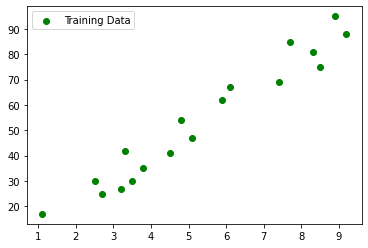

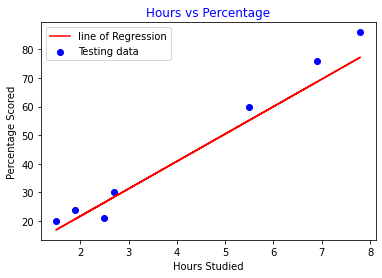

In [210]:
plt.scatter(xtrain,ytrain,color='green',label="Training Data")
plt.legend()
plt.show()
plt.plot(xtest,ypred,color='red',label="line of Regression")
plt.scatter(xtest,ytest,color='blue', label="Testing data")
plt.title('Hours vs Percentage', fontdict= { 'color':'blue'} )
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored') 
plt.legend()
plt.show()

## **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [211]:
##method 1 using y=mx+c
m=model.coef_
c=model.intercept_
x=9.25
y=m*x+c
y

array([[91.15693847]])

In [212]:
##method 2 using function
model.predict(np.array([[9.25]]))

array([[91.15693847]])